In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from gp_dataloader import GPDataGenerator

torch.manual_seed(1)
np.random.seed(1)

x_plot = torch.linspace(-2, 2, 400).unsqueeze(-1)
    
def plot_curve(gp, np_tuple, idx):
    x_context, y_context, x_target, y_target = np_tuple[idx]

    # Plot context
    plt.scatter(x_context, y_context, c='k', label='Context')

    # Fit GP to context
    gp.fit(x_context, y_context)
    mean, std = gp.predict(x_plot, return_std=True)

    # Plot GP predictions
    plt.plot(x_plot, mean, label='GP prediction')
    bound = std * 1.96
    plt.fill_between(x_plot.squeeze(), mean - bound, mean + bound, alpha=0.2)

    plt.legend()

def plot_4_curves(gp, np_tuple):
    fig = plt.figure(figsize=(25, 4))
    n_curves = 4
    for i in range(n_curves):
        plt.subplot(1, n_curves, i + 1)
        plot_curve(gp, np_tuple, i)

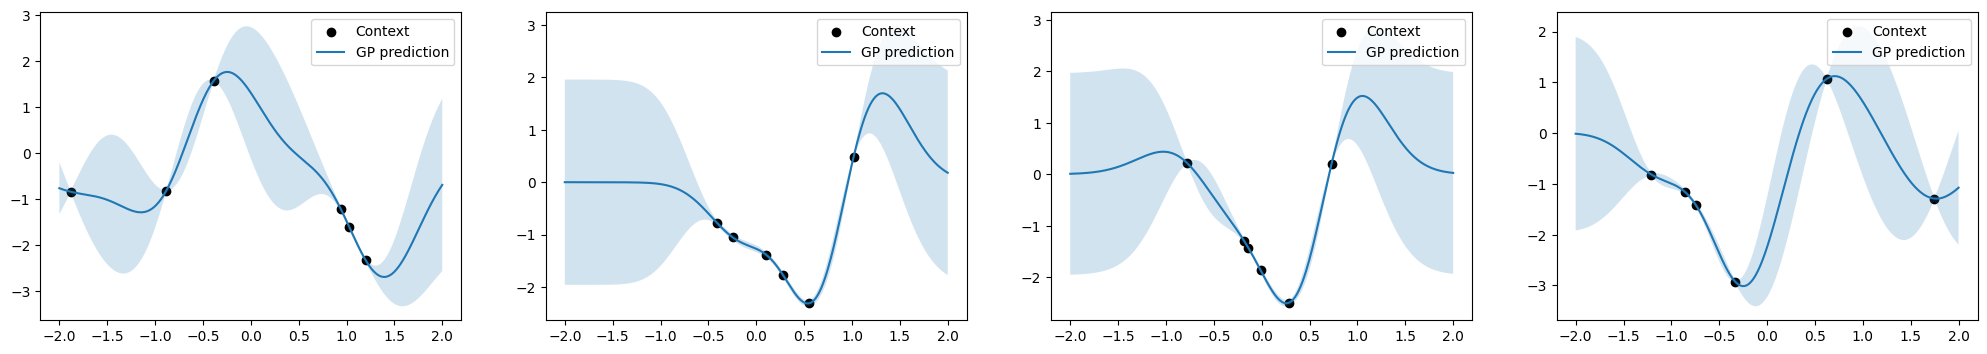

In [2]:
# GP predictions with few context points
gen_few_context = GPDataGenerator(max_n_context=7)
np_tuple_few_context = gen_few_context.generate_batch()

plot_4_curves(gen_few_context.gp, np_tuple_few_context)

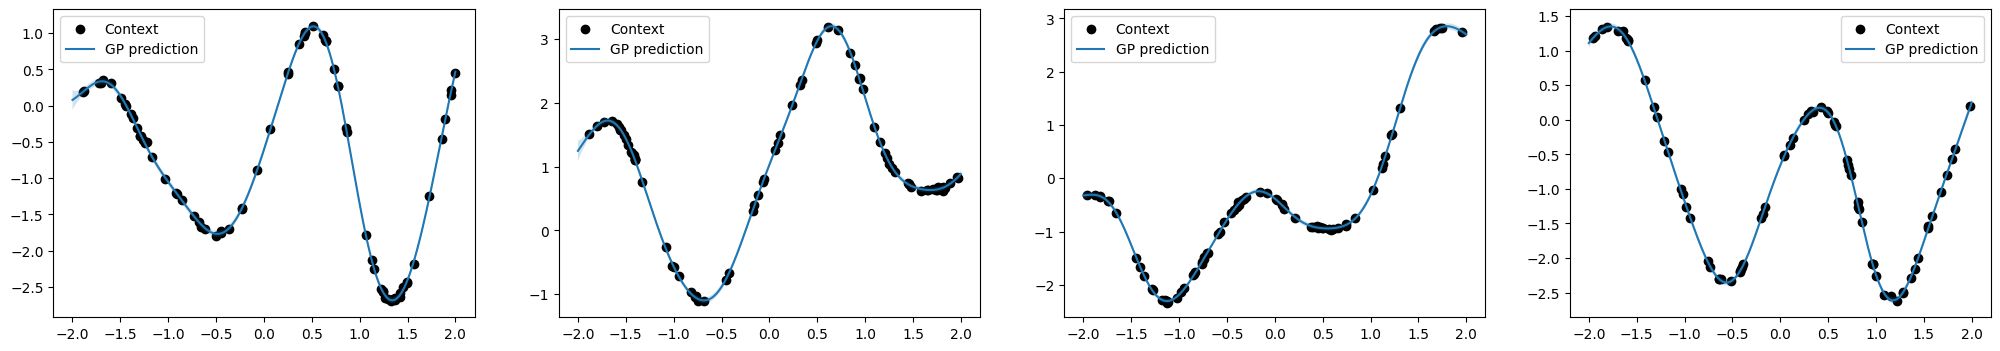

In [3]:
# GP predictions with many context points
gen_many_context = GPDataGenerator()
np_tuple_many_context = gen_many_context.generate_batch()

plot_4_curves(gen_many_context.gp, np_tuple_many_context)

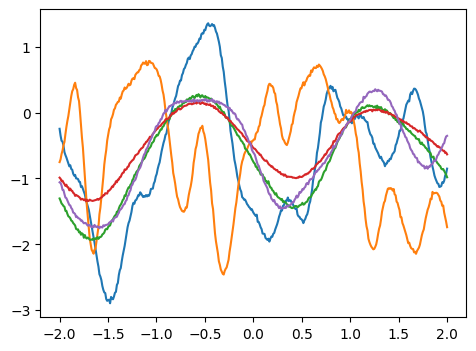

In [19]:
# GP functions with random kernel parameters
gen_changing_kernel_params = GPDataGenerator(randomize_kernel_params=True, testing=True)
np_tuple_changing_kernel = gen_changing_kernel_params.generate_batch()

fig = plt.figure(figsize=(5.5, 4))
n_curves = 5
for i in range(n_curves):
    x_context, y_context, x_target, y_target = np_tuple_changing_kernel[i]
    plt.plot(x_target, y_target)
plt.show()